In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies & Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read files as Pandas DataFrames
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
# Inspecting City Data (null values, data types, options for city type)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Get count of values that are not null.
print(city_df.count())
print()
print(city_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64

city            0
driver_count    0
type            0
dtype: int64


In [5]:
# Get data types for each column.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get unique values for type of city.
city_types = city_df["type"].unique()
city_types

# Get number of data points for each type of city.
type_num = []
for city_type in city_types:
    num = sum(city_df["type"] == city_type)
    type_num.append({city_type:num})
type_num

[{'Urban': 66}, {'Suburban': 36}, {'Rural': 18}]

In [7]:
# Inspecting Ride Data (null values, data types)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [8]:
# Get count of values that are not null.
print(ride_df.count())
print()
print(ride_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

city       0
date       0
fare       0
ride_id    0
dtype: int64


In [9]:
# Get data types.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [28]:
# Merge DataFrames on city column and display consolidated df.
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Bubble Chart: Avg Fare vs Total # of Rides (Bubble Size-Avg # of Drivers) for each City Type

In [19]:
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [32]:
# Create the Urban city DataFrame.
urban_df = pyber_df[pyber_df["type"]=="Urban"]
# Create the Suburban city DataFrame.
suburban_df = pyber_df[pyber_df["type"]=="Suburban"]
# Create the Rural city DataFrame.
rural_df = pyber_df[pyber_df["type"]=="Rural"]

In [39]:
# Get total number of rides for each city within each city type.
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [42]:
# Get the average fare for each city within each city type.
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [44]:
# Get the average number of drivers for each city within each city type.
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

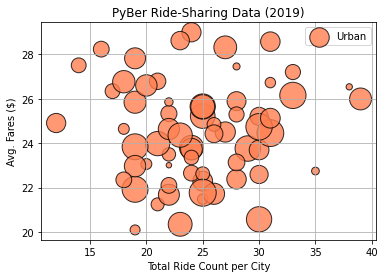

In [63]:
# Create scatter plot for urban cities.
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s = [10*i for i in urban_driver_count],
           c = "coral",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

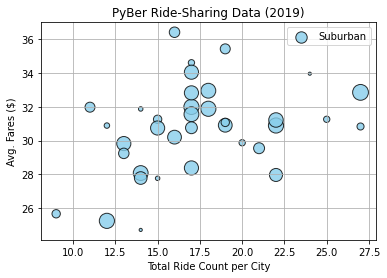

In [64]:
# Create scatter plot for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = [10*i for i in suburban_driver_count],
           c = "skyblue",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

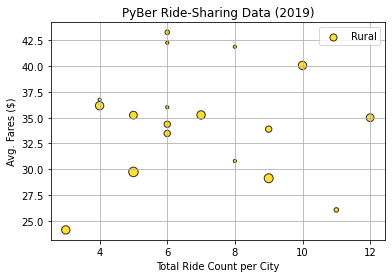

In [66]:
# Create scatter plot for rural cities.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = [10*i for i in rural_driver_count],
           c = "gold",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Ride Count per City")
plt.ylabel("Avg. Fares ($)")
plt.grid(True)
plt.legend()

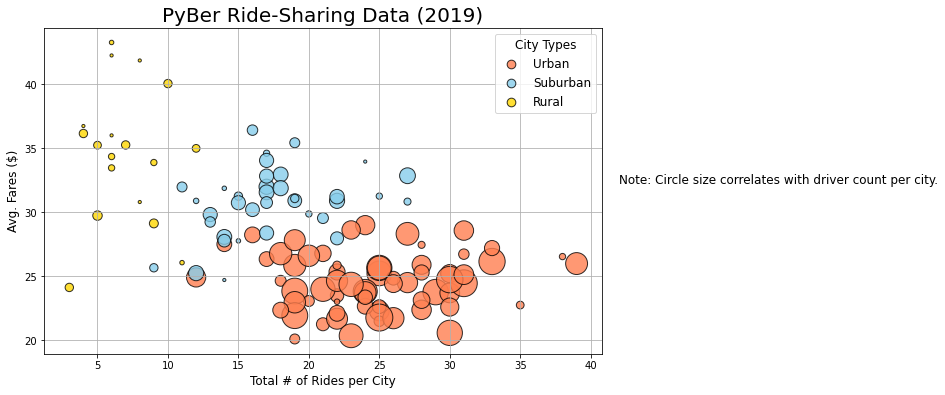

In [86]:
# Create combined bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s = [10*i for i in urban_driver_count],
           c = "coral",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = [10*i for i in suburban_driver_count],
           c = "skyblue",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = [10*i for i in rural_driver_count],
           c = "gold",
           linewidths = 1,
           edgecolor = "black",
           alpha = .8,
           label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel("Total # of Rides per City", fontsize = 12)
plt.ylabel("Avg. Fares ($)", fontsize = 12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
for i in range(len(city_types)):
    lgnd.legendHandles[i]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 32.25, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png", bbox_inches="tight", transparent=False, facecolor="white")

# Show plot
plt.show()